# Exercise 4  : Unsupervised Learning and Feature Engineering

## Task 1
###  Load Python libraries

## Task 1 - Clustering
### 1.1 Load Python libraries

In [97]:
#-- Here goes your code --
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 1.2 Load data and plot data
We will work on artificially generated data to get familiarized with two clustering algorithms

In [98]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

Define a function plot_clusters(X,y) and ensure that each group has a different color given by "y"

In [99]:
def plot_clusters(X,y):
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o',edgecolor='black', s=25)
    #plt.scatter(X, y)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Color based on x and y")
    plt.legend(loc="upper left")
    plt.show()

Call plot_clusters(X,y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


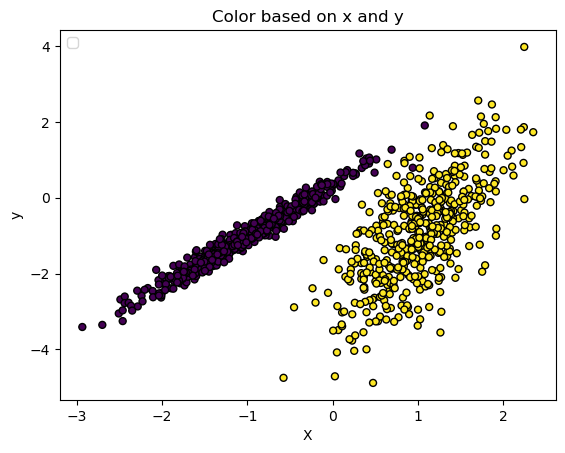

In [100]:
plot_clusters(X,y)

### 1.3 Define a kmeans model

In [101]:
km = KMeans(n_clusters=2, random_state=0)

### 1.4 Train/fit the kmeans model

In [102]:
km = km.fit(X)

### 1.5 Predict the clusters with the model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


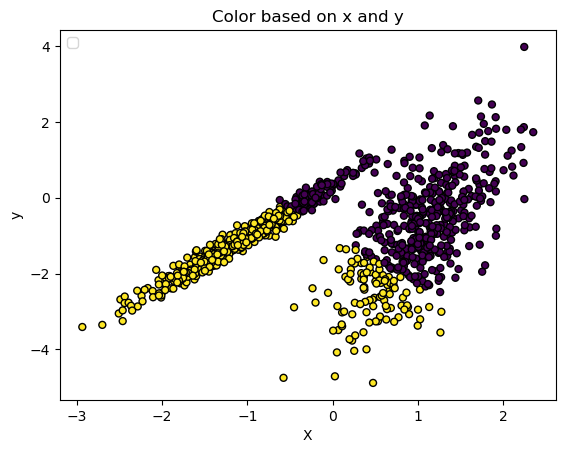

In [103]:
y_km = km.predict(X)
plot_clusters(X,y_km)

C:\Users\Artis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


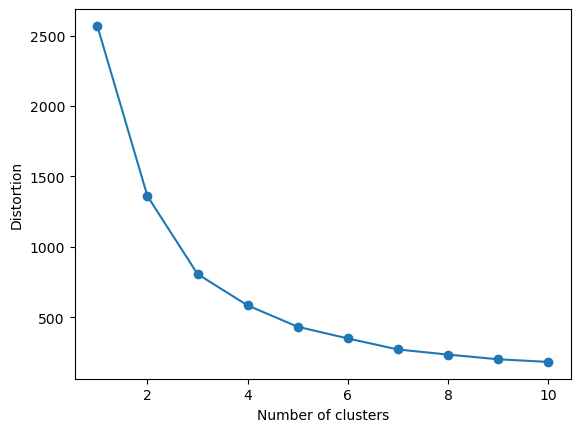

In [104]:
#This is to see the elbow
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### 1.6 Understand principle of DBSCAN
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

### 1.7 Define, train/fit and predict the clusters above with DBSCAN

In [115]:
db = DBSCAN(eps=0.3, min_samples=10)
y_db = db.fit_predict(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 61


### 1.8 Plot the DBSCAN clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


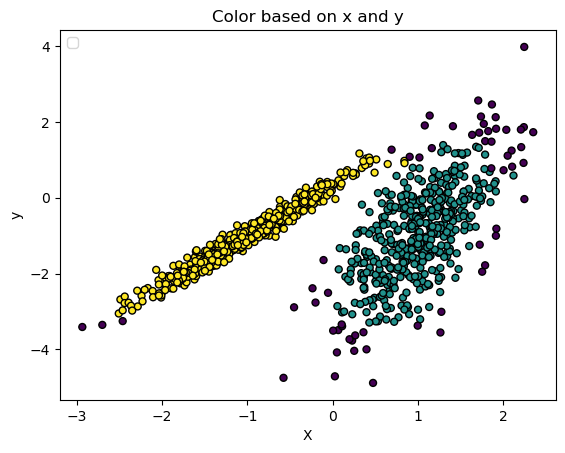

Purple is noise


In [116]:
plot_clusters(X, y_db)
print("Purple is noise")

## Task 2 - Feature reduction with PCA

In [117]:
from sklearn.model_selection import train_test_split
# ---- Load pca_data.csv into numpy array
data = pd.read_csv('./pca_data.csv',sep=',')
data = np.array(data)

### 2.1 Implementing PCA
PCA is a two-step procedure: First, compute the data covariance matrix. Then, use SVD to compute the eigenvectors (the principal components of variation in the data).

Prepare your implementation by first normalizing the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [121]:
from sklearn.decomposition import PCA
#Normalize
mean = np.mean(data, axis = 0)
data = data - mean

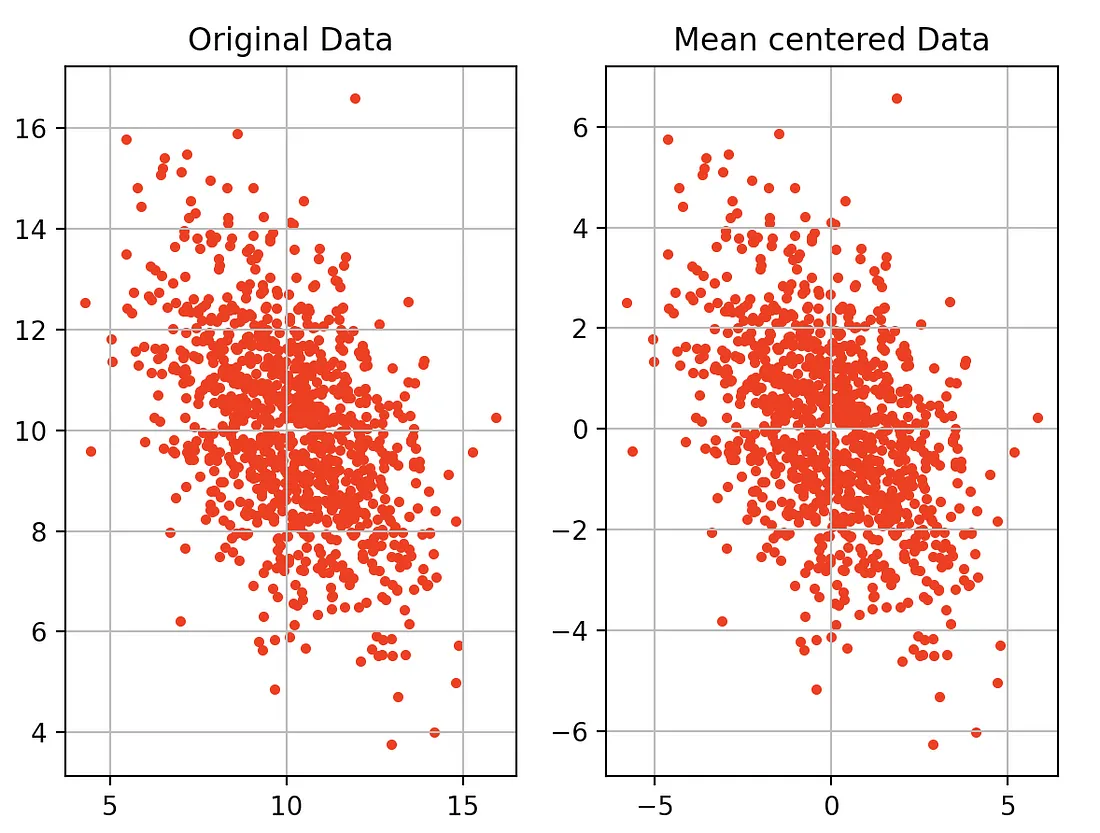

In [123]:
from sklearn.preprocessing import MinMaxScaler
#scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

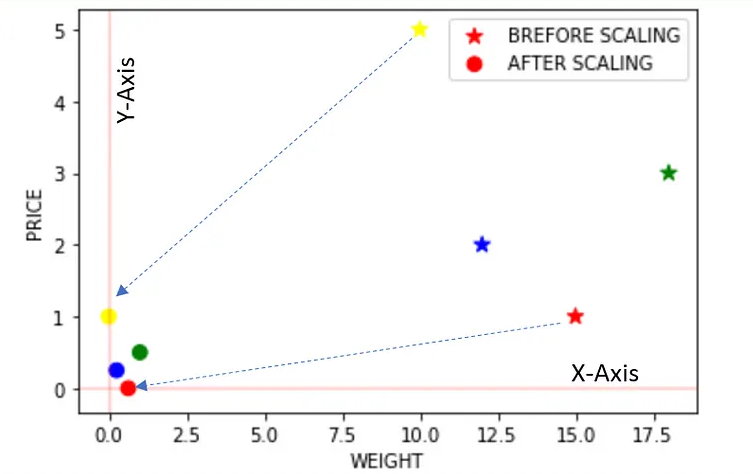

### 2.2 Call your PCA function on the normalized data

In [124]:
def implement_PCA(data):
    # Compute covariance matrix
    cov = np.cov(data.T)
    cov = np.round(cov, 2)
    # Perform eigen decomposition of covariance matrix
    eig_val, eig_vec = np.linalg.eig(cov)
    # Sort eigen values and corresponding eigen vectors in descending order
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    # Get explained variance
    sum_eig_val = np.sum(eig_val)
    explained_variance = eig_val/ sum_eig_val
    cumulative_variance = np.cumsum(explained_variance)
    # Take transpose of eigen vectors with data
    pca_data = np.dot(mean_data, eig_vec)
    return pca_data

In [125]:
implement_PCA(data)

array([[-0.69552857,  0.46479296],
       [-0.02222298, -0.14814854],
       [-0.38108463,  0.55033453],
       [ 0.99491543, -0.71711118],
       [ 0.32235382, -0.0055684 ],
       [ 0.17419351, -0.13323147],
       [ 0.44008949, -0.14287246],
       [-0.24068915, -0.16282296],
       [ 0.17189833,  0.2822522 ],
       [ 0.14938725, -0.01132577],
       [-0.45526623,  0.2465546 ],
       [ 0.56125125, -0.43339175],
       [-0.50549826,  0.3918126 ],
       [ 0.64102682, -0.23840815],
       [ 0.71366225, -0.14518317],
       [ 1.46647521, -0.61319368],
       [-0.96436446,  0.28617273],
       [-1.49534372,  0.79652023],
       [-0.15357197, -0.14312981],
       [ 0.25523404, -0.2678584 ],
       [ 0.6553714 , -0.36186895],
       [ 0.36753446, -0.31363106],
       [-1.79040852,  0.84448377],
       [-0.38409868,  0.17196126],
       [ 0.19629055,  0.07637317],
       [-0.03905474,  0.05619527],
       [ 0.58103869, -0.33634134],
       [-0.49121025,  0.31484303],
       [-0.3886265 ,

### 2.3 Project the data onto the principal components
The function project_data(X,U,K) projects the data on to the K principal components provided by U to create tranformation $$Z=X^TU_r$$
Then call the projection function for K=1.


In [40]:
scaler.transform()

### 2.4 Write and call a function to recover the compressed data and call function
The function recover_data(Z,U,K) recovers data by returning $Z^TU_r$. 
Use scaler.inverse_transform() on the normalization to undo the normalization.

In [41]:
scaler.inverse_transform()

### 2.5 Plot data and reduced dimensionality (compressed) data

In [42]:
# --- your code goes here

### 2.6 Perform PCA now via sklearn and compare plots


In [39]:
# --- your code goes here

## Task 3 - PCA on MNIST data set

MNIST Dataset

It describes a character recognition problem: the identification of hand-written digits. 
This problem involves both locating and identifying characters in an image. 

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# extract inputs and outputs
images = digits.images  # Black and white images represented by a matrix of 8x8 pixel box (a matrix of dimensions 8x8) 
print(images.shape)
X = digits.data # to use the classical ML method, each sample image is flattened to build a vector of 64 pixels.  (8x8)
print(X.shape)
y = digits.target # label of each image

(1797, 8, 8)
(1797, 64)


<Figure size 640x480 with 0 Axes>

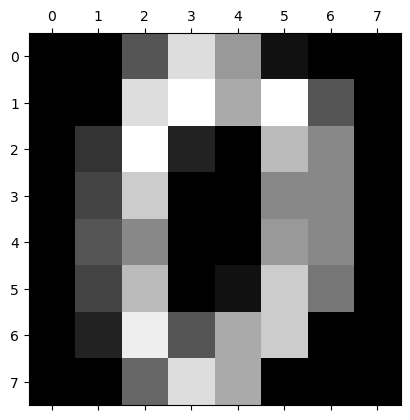

<Figure size 640x480 with 0 Axes>

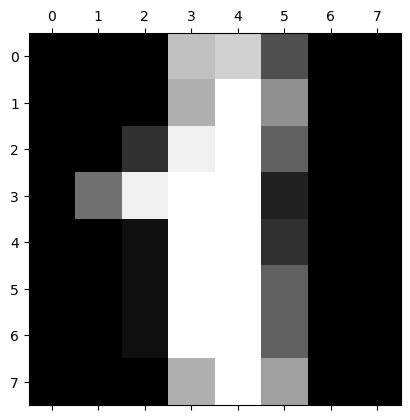

<Figure size 640x480 with 0 Axes>

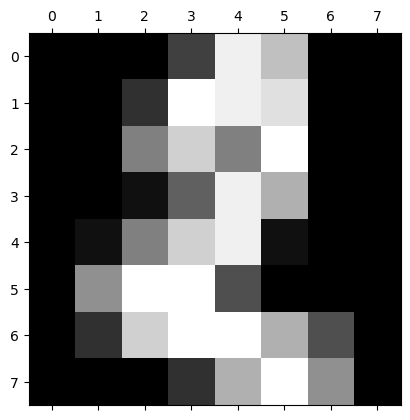

<Figure size 640x480 with 0 Axes>

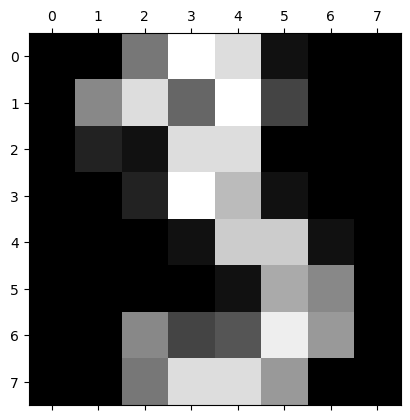

<Figure size 640x480 with 0 Axes>

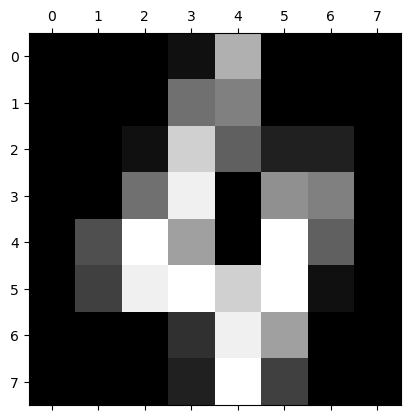

<Figure size 640x480 with 0 Axes>

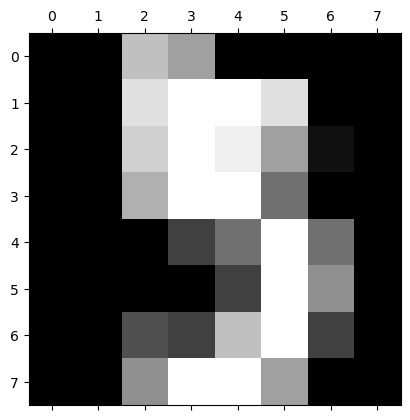

<Figure size 640x480 with 0 Axes>

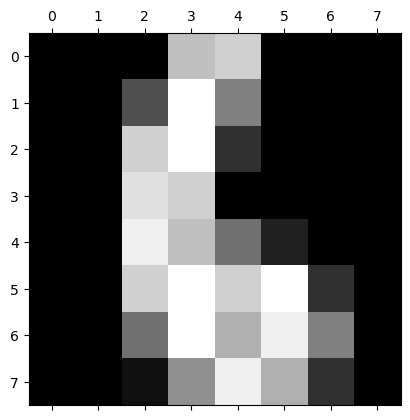

<Figure size 640x480 with 0 Axes>

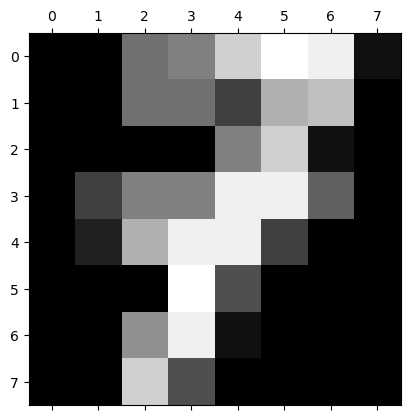

<Figure size 640x480 with 0 Axes>

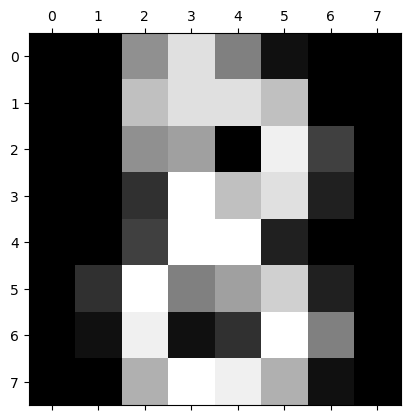

<Figure size 640x480 with 0 Axes>

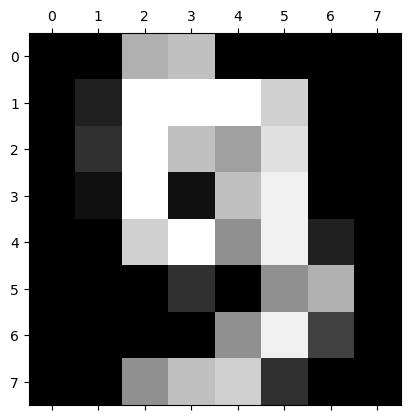

In [49]:
# Plot one image per class
for i in np.unique(y):
    pos = np.where(i == y)[0]
    im = images[pos]
    plt.gray()
    plt.matshow(im[0,:])
    plt.show()

## No feature reduction

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 3.1 Write function train_test_svm(X,y,random_state=42) that trains and test linear svm printing accuracy and confusion_matrix

### 3.2 Perform classification again with performing feature reduction beforehand

In [51]:
# --- your code goes here

In [55]:
#a = train_test_svm(Z,y)
#Did you see any increase in performance? If not, what would be the advantage of using SVM then? 